# Libraries

In [10]:
import tensorflow as tf
from keras.datasets import mnist
import numpy as np
import cv2
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Data

In [11]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Filter the dataset to only include digits 0, 1, and 2
train_filter = np.where((y_train == 0) | (y_train == 1) | (y_train == 2))
test_filter = np.where((y_test == 0) | (y_test == 1) | (y_test == 2))

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

# Preprocessing(Normalization)

In [12]:
# Normalize pixel values to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

In [20]:
# Optionally resize images (MNIST images are already 28x28, so resizing is not needed)
# If resizing is needed:
# from tensorflow.image import resize
# x_train = np.array([resize(image, (28, 28)).numpy() for image in x_train])
# x_test = np.array([resize(image, (28, 28)).numpy() for image in x_test])

# Hu Moments

In [13]:
# Function to calculate Hu moments
def calculate_hu_moments(images):
    hu_moments = []
    for image in images:
        # Convert image to binary
        _, binary_image = cv2.threshold(image, 0.5, 1.0, cv2.THRESH_BINARY)
        # Calculate moments
        moments = cv2.moments(binary_image)
        # Calculate Hu moments
        hu = cv2.HuMoments(moments).flatten()
        hu_moments.append(hu)
    return np.array(hu_moments)

In [14]:
# Calculate Hu moments for train and test sets
hu_train = calculate_hu_moments(x_train)
hu_test = calculate_hu_moments(x_test)

# Model

In [15]:
# Creating and training the SVM model
model = SVC(kernel='linear')
model.fit(hu_train, y_train)

SVC(kernel='linear')

In [16]:
# Predict on the test set
y_pred = model.predict(hu_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.98      0.78       980
           1       0.98      0.96      0.97      1135
           2       0.94      0.50      0.66      1032

    accuracy                           0.82      3147
   macro avg       0.86      0.81      0.80      3147
weighted avg       0.86      0.82      0.81      3147



# Result

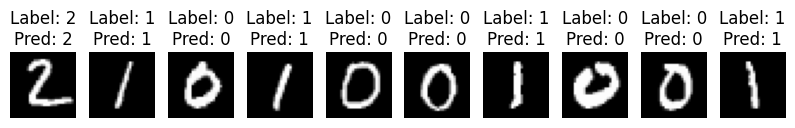

In [21]:
# Function to display images with predictions
def display_images_with_predictions(images, labels, predictions, num_images=10):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'Label: {labels[i]}\nPred: {predictions[i]}')
        plt.axis('off')
    plt.show()

# Display some test images with their predicted labels
display_images_with_predictions(x_test, y_test, y_pred, num_images=10)

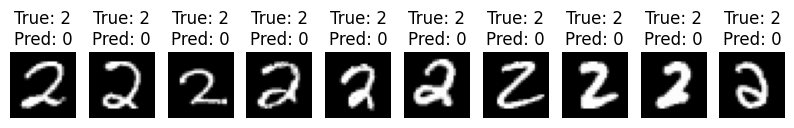

In [22]:
# Identify misclassified images
misclassified_indices = np.where(y_test != y_pred)[0]

# Function to display misclassified images
def display_misclassified_images(images, true_labels, predicted_labels, indices, num_images=10):
    plt.figure(figsize=(10, 10))
    for i in range(min(num_images, len(indices))):
        idx = indices[i]
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[idx], cmap='gray')
        plt.title(f'True: {true_labels[idx]}\nPred: {predicted_labels[idx]}')
        plt.axis('off')
    plt.show()

# Display misclassified images (up to 10 images)
display_misclassified_images(x_test, y_test, y_pred, misclassified_indices, num_images=10)